# Final Capstone Project

This notebook is going to be the final notebook for the capstone project. 

This notebook is dedicated to finding out if the problem of food scarcity in food deserts can be identified using machine learning. 

## Importing appropriate packages

In [102]:
# standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sb
sb.set(rc={'figure.figsize':(15,10)}) # default plot size
plt.style.use('fivethirtyeight') # default plot style


# packages for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# preprocessing packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

print('All packages are imported.')


All packages are imported.


## Webscrape a webpage for each of the zipcodes of New York City

#### Since New York is divided by borough, each their own county, they need to be webscraped individually. 

In [30]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_the_Bronx").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
bx = pd.DataFrame({"Neighborhood": neighborhoodList})


bx['Neighborhood'] = bx['Neighborhood'].astype(str).str[1:]


sep = '('
bx['Neighborhood'] = bx['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
bx['Neighborhood'] = bx['Neighborhood'].str.strip()
bx['Neighborhood'] = bx['Neighborhood'].str.rstrip()

In [31]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bronx, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in bx["Neighborhood"].tolist() ]

In [32]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
bx['Latitude'] = df_coords['Latitude']
bx['Longitude'] = df_coords['Longitude']

In [33]:
# save the DataFrame as CSV file
bx.to_csv("bx_neighborhoods.csv", index=False)

# check the neighborhoods and the coordinates
print(bx.shape)
bx.head()

(31, 3)


,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.88573
1,"Belmont, Bronx‎",40.855460,-73.88569
2,"City Island, Bronx‎",40.855640,-73.79171
3,"Co-op City, Bronx‎",40.879939,-73.82317
4,"Concourse, Bronx‎",40.827630,-73.92533
5,"Eastchester, Bronx‎",40.888110,-73.82835
6,"Fordham, Bronx‎",40.858940,-73.89885
7,"Highbridge, Bronx‎",40.842117,-73.92820
8,"Hunts Point, Bronx‎",40.812420,-73.88450
9,"Jerome Park, Bronx‎",40.865470,-73.89896


## Manhattan

In [34]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Manhattan").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
mh = pd.DataFrame({"Neighborhood": neighborhoodList})


mh['Neighborhood'] = mh['Neighborhood'].astype(str).str[1:]


sep = '('
mh['Neighborhood'] = mh['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
mh['Neighborhood'] = mh['Neighborhood'].str.strip()

In [35]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Manhattan, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in mh["Neighborhood"].tolist() ]

In [36]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
mh['Latitude'] = df_coords['Latitude']
mh['Longitude'] = df_coords['Longitude']

# save the DataFrame as CSV file
mh.to_csv("mh_neighborhoods.csv", index=False)

# check the neighborhoods and the coordinates
print(mh.shape)
mh.head()

(44, 3)


,Neighborhood,Latitude,Longitude
0,Battery Park City‎,40.711310,-74.015900
1,Bowery‎,40.723280,-73.992893
2,"Chelsea, Manhattan‎",40.746100,-74.000450
3,"Civic Center, Manhattan‎",40.713370,-74.003800
4,Columbus Circle‎,40.765730,-73.983380
5,East Harlem‎,40.798280,-73.940810
6,"East Village, Manhattan‎",40.728040,-73.984990
7,"Financial District, Manhattan‎",40.708260,-74.014100
8,"Five Points, Manhattan‎",45.858578,-111.328778
9,Flatiron District‎,40.739420,-73.990350


## Brooklyn

In [37]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Brooklyn").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
bk = pd.DataFrame({"Neighborhood": neighborhoodList})


bk['Neighborhood'] = bk['Neighborhood'].astype(str).str[1:]


sep = '('
bk['Neighborhood'] = bk['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
bk['Neighborhood'] = bk['Neighborhood'].str.strip()

In [38]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Brooklyn, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in bk["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
bk['Latitude'] = df_coords['Latitude']
bk['Longitude'] = df_coords['Longitude']

In [39]:
bk = bk.drop(32,axis = 0)

In [40]:
# save the DataFrame as CSV file
bk.to_csv("bk_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(bk.shape)
bk.head()

(39, 3)


,Neighborhood,Latitude,Longitude
0,"Bay Ridge, Brooklyn‎",40.619600,-74.027569
1,"Bedford–Stuyvesant, Brooklyn‎",40.681945,-73.933294
2,"Bensonhurst, Brooklyn‎",40.604820,-73.995280
3,Boerum Hill‎,40.689430,-73.988010
4,"Borough Park, Brooklyn‎",40.638820,-73.989120
5,Brighton Beach‎,40.574570,-73.953430
6,Brooklyn Heights‎,40.695350,-73.994050
7,Brooklyn Navy Yard‎,40.705177,-73.971624
8,"Brownsville, Brooklyn‎",40.671134,-73.913476
9,"Bushwick, Brooklyn‎",40.713488,-73.941454


## Queens

In [11]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Queens,_New_York").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
qn = pd.DataFrame({"Neighborhood": neighborhoodList})


In [12]:
qn['Neighborhood'] = qn['Neighborhood'].astype(str).str[1:]

sep = '('
qn['Neighborhood'] = qn['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
qn['Neighborhood'] = qn['Neighborhood'].str.strip()

In [13]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Brooklyn, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in qn["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
qn['Latitude'] = df_coords['Latitude']
qn['Longitude'] = df_coords['Longitude']

In [14]:
qn = qn.drop([20,22],axis = 0)


In [15]:
# save the DataFrame as CSV file
qn.to_csv("qn_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(qn.shape)
qn.head()

(27, 3)


,Neighborhood,Latitude,Longitude
0,"Astoria, Queens‎",40.772050,-73.926060
1,"Bayside, Queens‎",40.777310,-73.780680
2,"Corona, Queens‎",40.746370,-73.854830
3,"Douglaston–Little Neck, Queens‎",40.768561,-73.747657
4,"East Elmhurst, Queens‎",40.764390,-73.874020
5,"Elmhurst, Queens‎",40.743610,-73.884330
6,"Floral Park, New York‎",40.664506,-73.979842
7,"Flushing, Queens‎",40.706477,-73.925219
8,"Forest Hills, Queens‎",40.722660,-73.847910
9,"Fresh Meadows, Queens‎",40.741620,-73.782990


## Staten Island

In [67]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Staten_Island").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
si = pd.DataFrame({"Neighborhood": neighborhoodList})


In [68]:
si = si.drop([0],axis = 0)

In [69]:
si.head()

,Neighborhood
1,"Annadale, Staten Island"
2,"Arden Heights, Staten Island"
3,"Arlington, Staten Island"
4,"Arrochar, Staten Island"
5,Aspen Knolls
6,"Bay Terrace, Staten Island"
7,"Bloomfield, Staten Island"
8,"Brighton Heights, Staten Island"
9,"Bulls Head, Staten Island"
10,"Castleton Corners, Staten Island"


In [70]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Staten Island, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in si["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
si['Latitude'] = df_coords['Latitude']
si['Longitude'] = df_coords['Longitude']

In [71]:
si.head()

,Neighborhood,Latitude,Longitude
1,"Annadale, Staten Island",40.559891,-74.198791
2,"Arden Heights, Staten Island",40.642395,-74.110820
3,"Arlington, Staten Island",40.642420,-74.075270
4,"Arrochar, Staten Island",40.562344,-74.184025
5,Aspen Knolls,40.554536,-74.135866
6,"Bay Terrace, Staten Island",40.610592,-74.179655
7,"Bloomfield, Staten Island",40.504032,-74.243297
8,"Brighton Heights, Staten Island",40.642420,-74.075270
9,"Bulls Head, Staten Island",40.621220,-74.129150
10,"Castleton Corners, Staten Island",40.549418,-74.216839


In [72]:
# save the DataFrame as CSV file
si.to_csv("si_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(si.shape)
si.head()

(73, 3)


,Neighborhood,Latitude,Longitude
1,"Annadale, Staten Island",40.559891,-74.198791
2,"Arden Heights, Staten Island",40.642395,-74.110820
3,"Arlington, Staten Island",40.642420,-74.075270
4,"Arrochar, Staten Island",40.562344,-74.184025
5,Aspen Knolls,40.554536,-74.135866
6,"Bay Terrace, Staten Island",40.610592,-74.179655
7,"Bloomfield, Staten Island",40.504032,-74.243297
8,"Brighton Heights, Staten Island",40.642420,-74.075270
9,"Bulls Head, Staten Island",40.621220,-74.129150
10,"Castleton Corners, Staten Island",40.549418,-74.216839


In [87]:
ny = pd.concat([bx,mh,bk,qn,si], ignore_index = True)

In [444]:
ny.head

<bound method NDFrame.head of                          Neighborhood   Latitude  Longitude
0                Bedford Park, Bronx‎  40.869990 -73.885730
1                     Belmont, Bronx‎  40.855460 -73.885690
2                 City Island, Bronx‎  40.855640 -73.791710
3                  Co-op City, Bronx‎  40.879939 -73.823170
4                   Concourse, Bronx‎  40.827630 -73.925330
..                                ...        ...        ...
206          Ward Hill, Staten Island  40.633485 -74.118298
207  West New Brighton, Staten Island  40.557574 -74.204474
208         West Shore, Staten Island  40.618020 -74.132850
209        Westerleigh, Staten Island  40.603201 -74.141223
210        Willowbrook, Staten Island  40.550491 -74.187332

[211 rows x 3 columns]>

In [89]:
ny = ny.drop([39,47,213],axis= 0)

In [90]:
ny.to_csv('ny_neighborhood.csv',index=False)


## Map the points using Folium

In [91]:
# get the coordinates of New York City
address = 'New York, New York'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York, New York {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York, New York 40.7127281, -74.0060152.


In [93]:
# create map of Toronto using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(ny['Latitude'], ny['Longitude'], ny['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ny)  
    
map_ny

## Next, we use the Foursquare API. 

#### First, for New York City

In [347]:
ny = pd.read_csv('ny_neighborhood.csv')

In [348]:
ny

,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.885730
1,"Belmont, Bronx‎",40.855460,-73.885690
2,"City Island, Bronx‎",40.855640,-73.791710
3,"Co-op City, Bronx‎",40.879939,-73.823170
4,"Concourse, Bronx‎",40.827630,-73.925330
...,...,...,...
206,"Ward Hill, Staten Island",40.633485,-74.118298
207,"West New Brighton, Staten Island",40.557574,-74.204474
208,"West Shore, Staten Island",40.618020,-74.132850
209,"Westerleigh, Staten Island",40.603201,-74.141223


In [349]:
# define Foursquare Credentials and Version
CLIENT_ID = 'YY33K33K0USBP5V1DVMQWJRA1GKLTOYNUO5XBIYNYTTZK3SU' # your Foursquare ID
CLIENT_SECRET = 'QLZR43OPOROIGFRTDKNQYJE3PXMYW4TTGFWQZK4VAAOAIXY4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [355]:
radius = 2000
LIMIT = 200

venues = []

for lat, long, neighborhood in zip(ny['Latitude'], ny['Longitude'], ny['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [356]:

# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(100)

(19422, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"Bedford Park, Bronx‎",40.86999,-73.88573,E. Mosholu Parkway South and Bainbridge Ave,40.872248,-73.882286,Park
1,"Bedford Park, Bronx‎",40.86999,-73.88573,The New York Botanical Gardens - The Rock Garden,40.864459,-73.882456,Beer Garden
2,"Bedford Park, Bronx‎",40.86999,-73.88573,Enid A. Haupt Conservatory,40.864256,-73.882154,Botanical Garden
3,"Bedford Park, Bronx‎",40.86999,-73.88573,Mosholu Gate,40.866607,-73.880878,Garden
4,"Bedford Park, Bronx‎",40.86999,-73.88573,NYBG Holiday Train Show,40.864100,-73.882050,Exhibit
...,...,...,...,...,...,...,...
95,"Bedford Park, Bronx‎",40.86999,-73.88573,Cafe al Mercato,40.854176,-73.888085,Italian Restaurant
96,"Bedford Park, Bronx‎",40.86999,-73.88573,Lucky Star Chinese Restaurant,40.869648,-73.903508,Chinese Restaurant
97,"Bedford Park, Bronx‎",40.86999,-73.88573,El Malecon,40.879338,-73.904457,Caribbean Restaurant
98,"Bedford Park, Bronx‎",40.86999,-73.88573,The Bronx Public,40.878377,-73.903481,Pub


In [361]:
print('There are {} uniques types of venues.'.format(len(venues_df['VenueCategory'].unique())))


# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

There are 426 uniques types of venues.


array(['Park', 'Beer Garden', 'Botanical Garden', 'Garden', 'Exhibit',
       'History Museum', 'Gift Shop', 'Pizza Place', 'Farmers Market',
       'Diner', 'Coffee Shop', 'Café', 'Food Truck', 'Italian Restaurant',
       'Deli / Bodega', 'Mexican Restaurant', 'Martial Arts School',
       'Gym / Fitness Center', 'Trail', 'Vietnamese Restaurant', 'Pub',
       'Theater', 'Supermarket', 'Tattoo Parlor', 'Plaza', 'Bakery',
       'Food & Drink Shop', 'Video Game Store', 'Market', 'Fish Market',
       'Grocery Store', 'Fast Food Restaurant', 'Dessert Shop',
       'Juice Bar', 'Smoke Shop', 'Tram Station', 'Bar', 'Liquor Store',
       'Yoga Studio', 'Gourmet Shop', 'Zoo', 'New American Restaurant',
       'Latin American Restaurant', 'Chinese Restaurant',
       'Caribbean Restaurant', 'Cheese Shop', 'Zoo Exhibit', 'Theme Park',
       'American Restaurant', 'Souvenir Shop'], dtype=object)

In [399]:
# one hot encoding
ny_hot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_hot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_hot.columns[-1]] + list(ny_hot.columns[:-1])
ny_hot = ny_hot[fixed_columns]


import re
ny_hot['Neighborhoods'] = ny_hot['Neighborhoods'].map(lambda x: re.sub(r'\W+', ' ', x))


print(ny_hot.shape)
ny_hot.head()

(19422, 427)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [512]:
ny_hot = ny_hot[['Neighborhoods','Supermarket','Market',
                 'Fast Food Restaurant','Grocery Store']]
ny_hot.head()

,Neighborhoods,Supermarket,Market,Fast Food Restaurant,Grocery Store
39,Bedford Park Bronx,1,0,0,0
52,Bedford Park Bronx,0,1,0,0
61,Bedford Park Bronx,0,0,0,1
63,Bedford Park Bronx,0,0,1,0
99,Bedford Park Bronx,0,0,0,1


In [513]:
ny_hot.dtypes

Neighborhoods           object
Supermarket              uint8
Market                   uint8
Fast Food Restaurant     uint8
Grocery Store            uint8
dtype: object

In [514]:
new_series = (ny_hot[['Supermarket','Market',
                      'Fast Food Restaurant','Grocery Store']] >= 1).any(axis=1)
new_series.head()

39    True
52    True
61    True
63    True
99    True
dtype: bool

In [515]:
ny_hot = ny_hot.loc[new_series]
ny_hot.head()

,Neighborhoods,Supermarket,Market,Fast Food Restaurant,Grocery Store
39,Bedford Park Bronx,1,0,0,0
52,Bedford Park Bronx,0,1,0,0
61,Bedford Park Bronx,0,0,0,1
63,Bedford Park Bronx,0,0,1,0
99,Bedford Park Bronx,0,0,0,1


In [516]:
ny_grouped = ny_hot.groupby(["Neighborhoods"]).mean().reset_index()

print(ny_grouped.shape)
ny_grouped

(200, 5)


,Neighborhoods,Supermarket,Market,Fast Food Restaurant,Grocery Store
0,Annadale Staten Island,0.000000,0.0,0.000000,1.00
1,Arden Heights Staten Island,0.200000,0.0,0.800000,0.00
2,Arlington Staten Island,0.000000,0.0,1.000000,0.00
3,Arrochar Staten Island,0.000000,0.0,1.000000,0.00
4,Aspen Knolls,0.333333,0.0,0.166667,0.50
...,...,...,...,...,...
195,Willowbrook Staten Island,0.000000,0.0,0.500000,0.50
196,Woodhaven Queens,0.250000,0.0,0.250000,0.50
197,Woodside Queens,0.000000,0.0,0.250000,0.75
198,World Trade Center,0.000000,0.0,0.000000,1.00


# Feature Selection
I have too many features so I am going to use PCA in order to determine the highest number of variance. 

In [517]:
from sklearn.decomposition import PCA

In [518]:
ny_grouped.columns.values

array(['Neighborhoods', 'Supermarket', 'Market', 'Fast Food Restaurant',
       'Grocery Store'], dtype=object)

In [519]:
ny_grouped.isna().sum()

Neighborhoods           0
Supermarket             0
Market                  0
Fast Food Restaurant    0
Grocery Store           0
dtype: int64

## Choosing Relevant Dimensions

Since we are doing a report on the food deserts, I chose venues that sell food. Including both supermarkets that sell all types and fast food that sell only quickly prepared food. 

In [521]:
y = ny_grouped[['Neighborhoods','Supermarket','Market', 'Fast Food Restaurant', 'Grocery Store']]
y.rename(columns={"Neighborhoods": "Neighborhood"}, inplace = True)

X = ny_grouped[['Supermarket','Market', 'Fast Food Restaurant','Grocery Store']]
print(len(X))

200


In [522]:
y

,Neighborhood,Supermarket,Market,Fast Food Restaurant,Grocery Store
0,Annadale Staten Island,0.000000,0.0,0.000000,1.00
1,Arden Heights Staten Island,0.200000,0.0,0.800000,0.00
2,Arlington Staten Island,0.000000,0.0,1.000000,0.00
3,Arrochar Staten Island,0.000000,0.0,1.000000,0.00
4,Aspen Knolls,0.333333,0.0,0.166667,0.50
...,...,...,...,...,...
195,Willowbrook Staten Island,0.000000,0.0,0.500000,0.50
196,Woodhaven Queens,0.250000,0.0,0.250000,0.50
197,Woodside Queens,0.000000,0.0,0.250000,0.75
198,World Trade Center,0.000000,0.0,0.000000,1.00


In [523]:
X

,Supermarket,Market,Fast Food Restaurant,Grocery Store
0,0.000000,0.0,0.000000,1.00
1,0.200000,0.0,0.800000,0.00
2,0.000000,0.0,1.000000,0.00
3,0.000000,0.0,1.000000,0.00
4,0.333333,0.0,0.166667,0.50
...,...,...,...,...
195,0.000000,0.0,0.500000,0.50
196,0.250000,0.0,0.250000,0.50
197,0.000000,0.0,0.250000,0.75
198,0.000000,0.0,0.000000,1.00


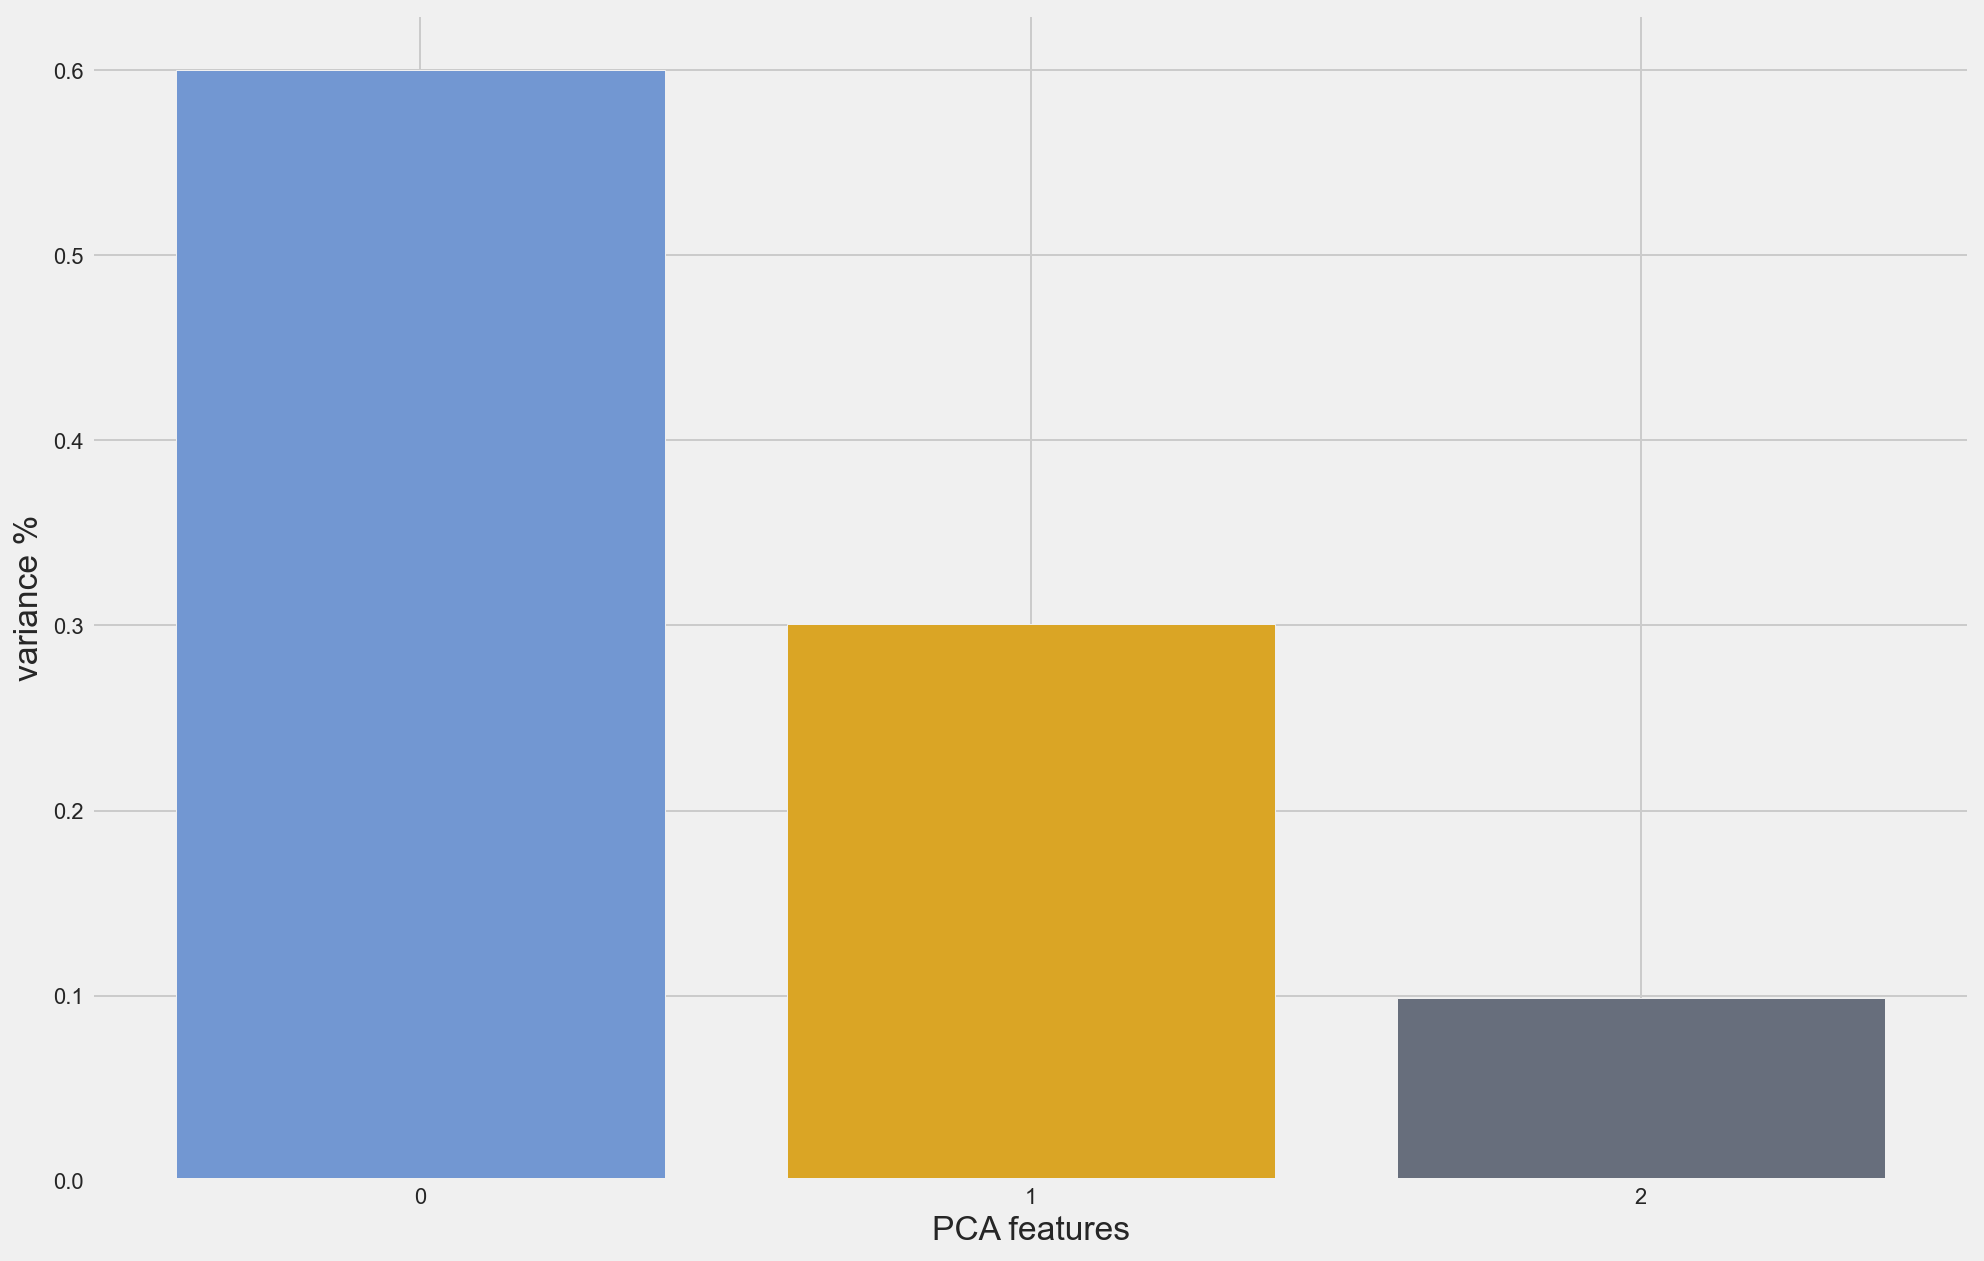

In [524]:
from sklearn.decomposition import PCA

%config InlineBackend.figure_format='retina'
# Standardize the data to have a mean of ~0 and a variance of 1
X_std =  MinMaxScaler().fit_transform(X)
# Create a PCA instance: pca
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color=('#7297d2','#daa525', '#676e7c', '#1b2a4d'))
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [525]:
PCA_components

,0,1,2
0,-0.533440,-0.072538,-0.042062
1,0.749326,-0.249898,-0.097341
2,0.805116,-0.526899,-0.084777
3,0.805116,-0.526899,-0.084777
4,0.042855,0.161950,-0.084360
...,...,...,...
195,0.135838,-0.299719,-0.063420
196,0.066100,0.046533,-0.079125
197,-0.198801,-0.186128,-0.052741
198,-0.533440,-0.072538,-0.042062


In [526]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
#pc4 = pca.components_[3]
#pc5 = pca.components_[4]
"""pc6 = pca.components_[5]
pc7 = pca.components_[6]

"""

'pc6 = pca.components_[5]\npc7 = pca.components_[6]\n\n'

In [527]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=X.columns.values)
str_loading_1

Supermarket             0.102577
Market                  0.018315
Fast Food Restaurant    0.219083
Grocery Store          -0.339975
dtype: float64

In [528]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=X.columns.values)
str_loading_2

Supermarket             0.223556
Market                  0.014197
Fast Food Restaurant   -0.186066
Grocery Store          -0.051687
dtype: float64

In [529]:
structure_loading_3 = pc3* np.sqrt(eig_values[2])
str_loading_3 = pd.Series(structure_loading_3, index=X.columns.values)
str_loading_3

Supermarket            -0.058226
Market                  0.146179
Fast Food Restaurant   -0.047592
Grocery Store          -0.040361
dtype: float64

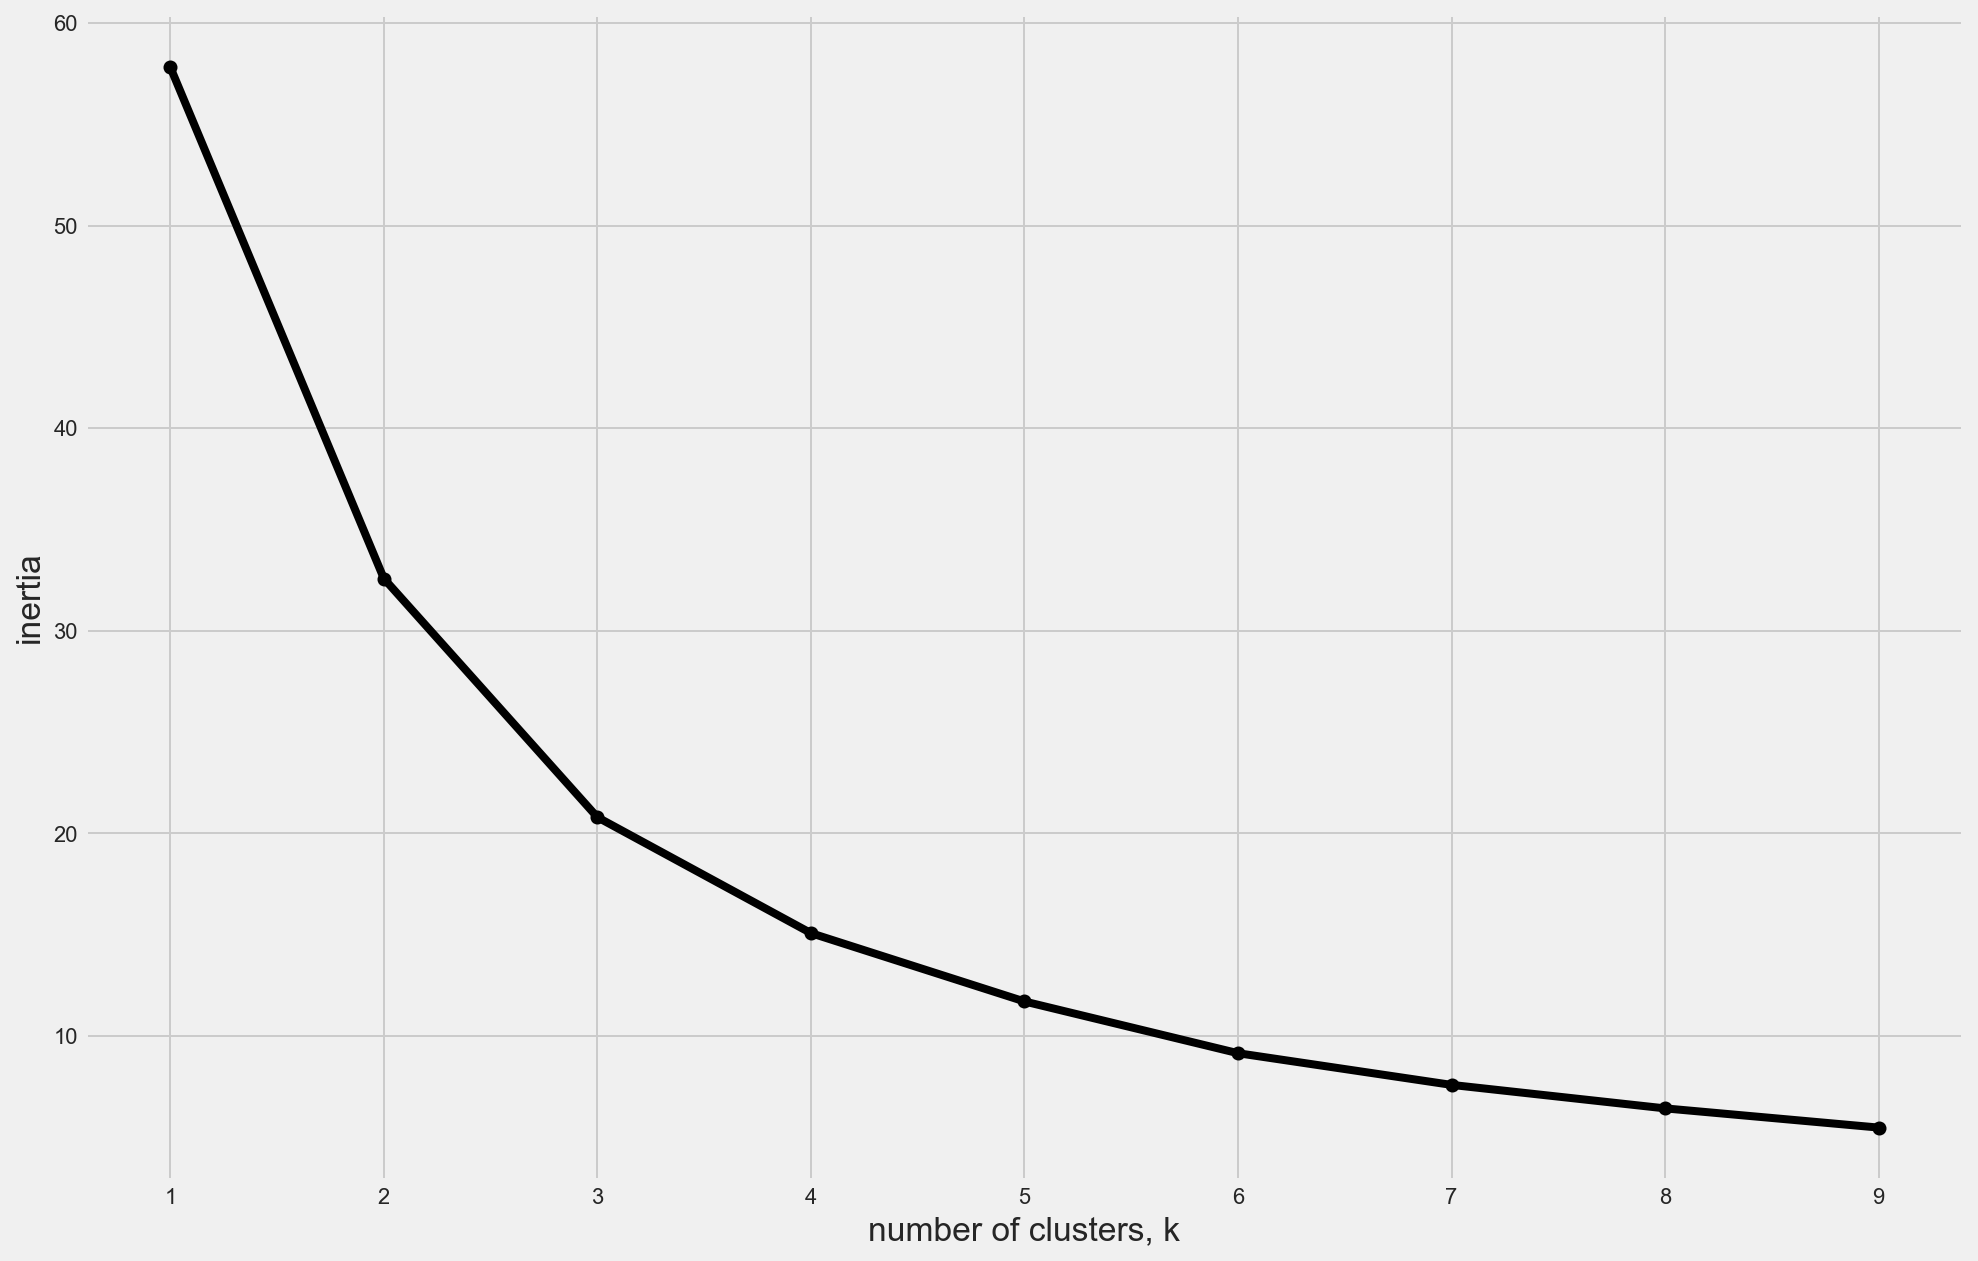

In [530]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

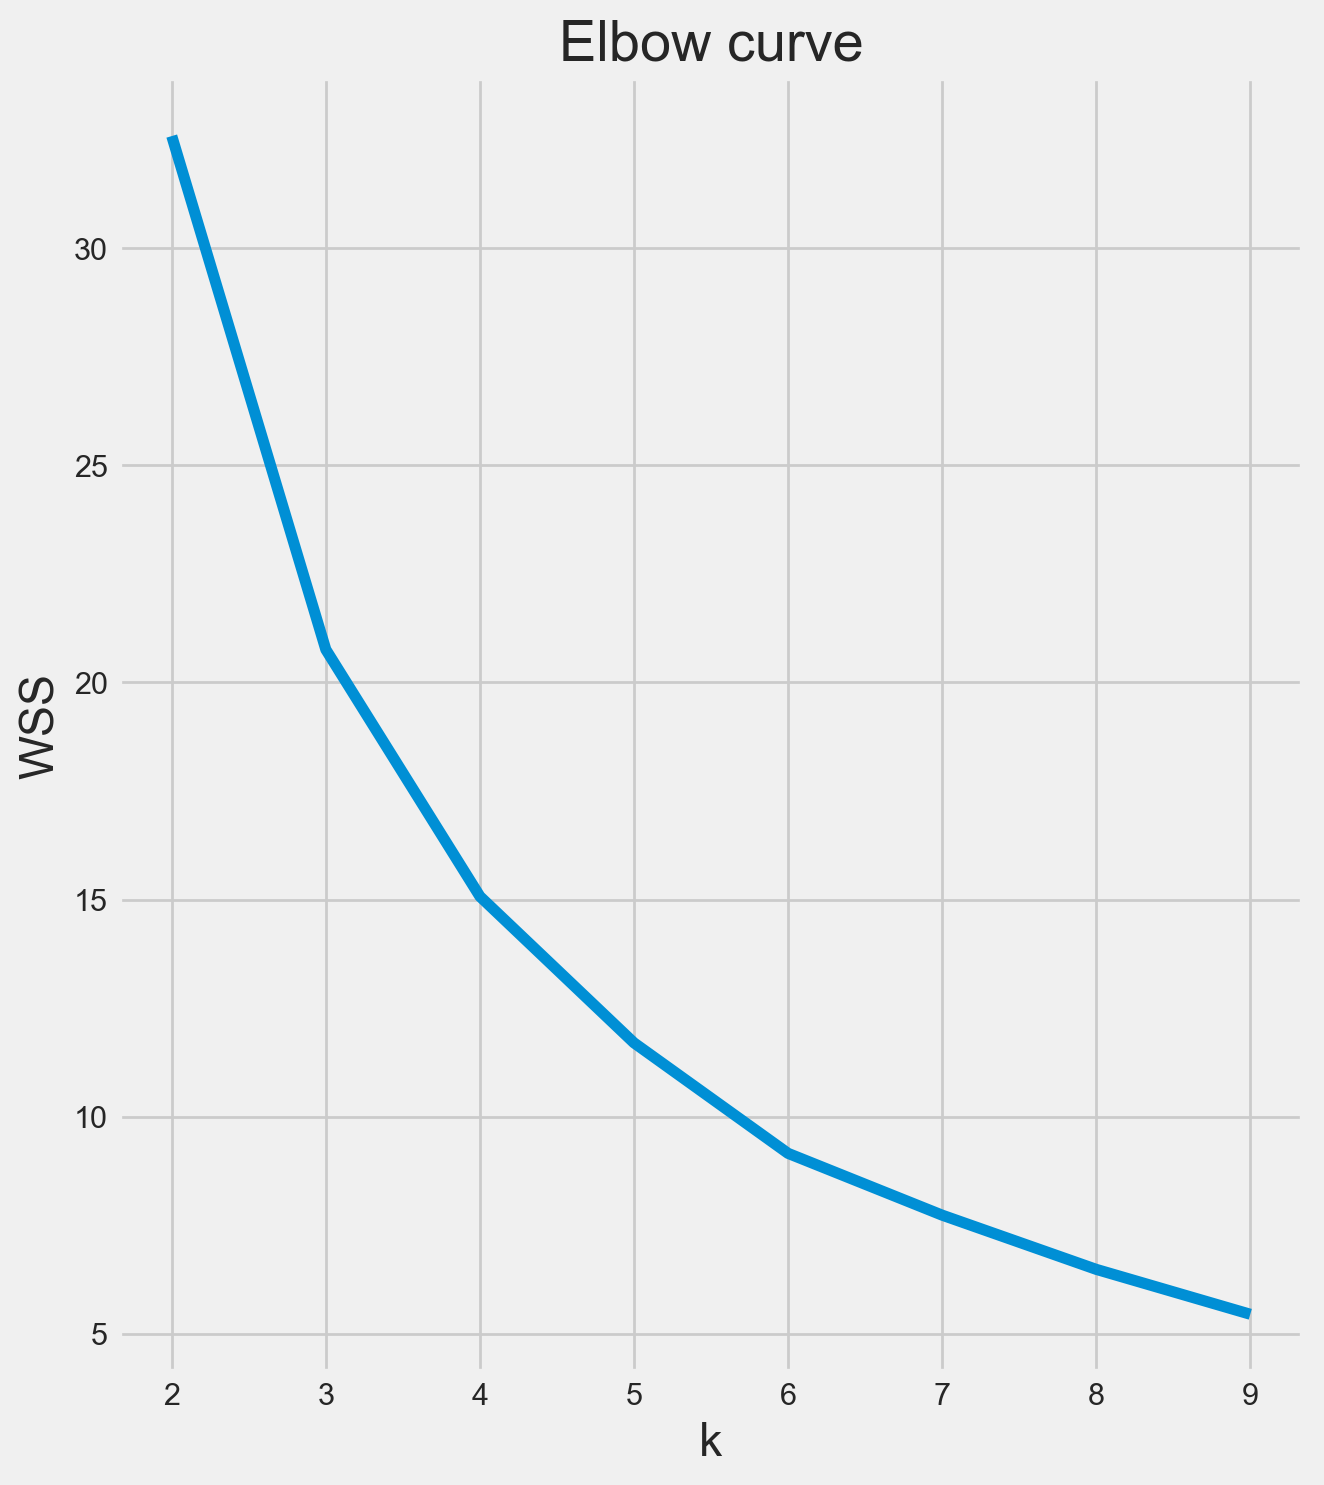

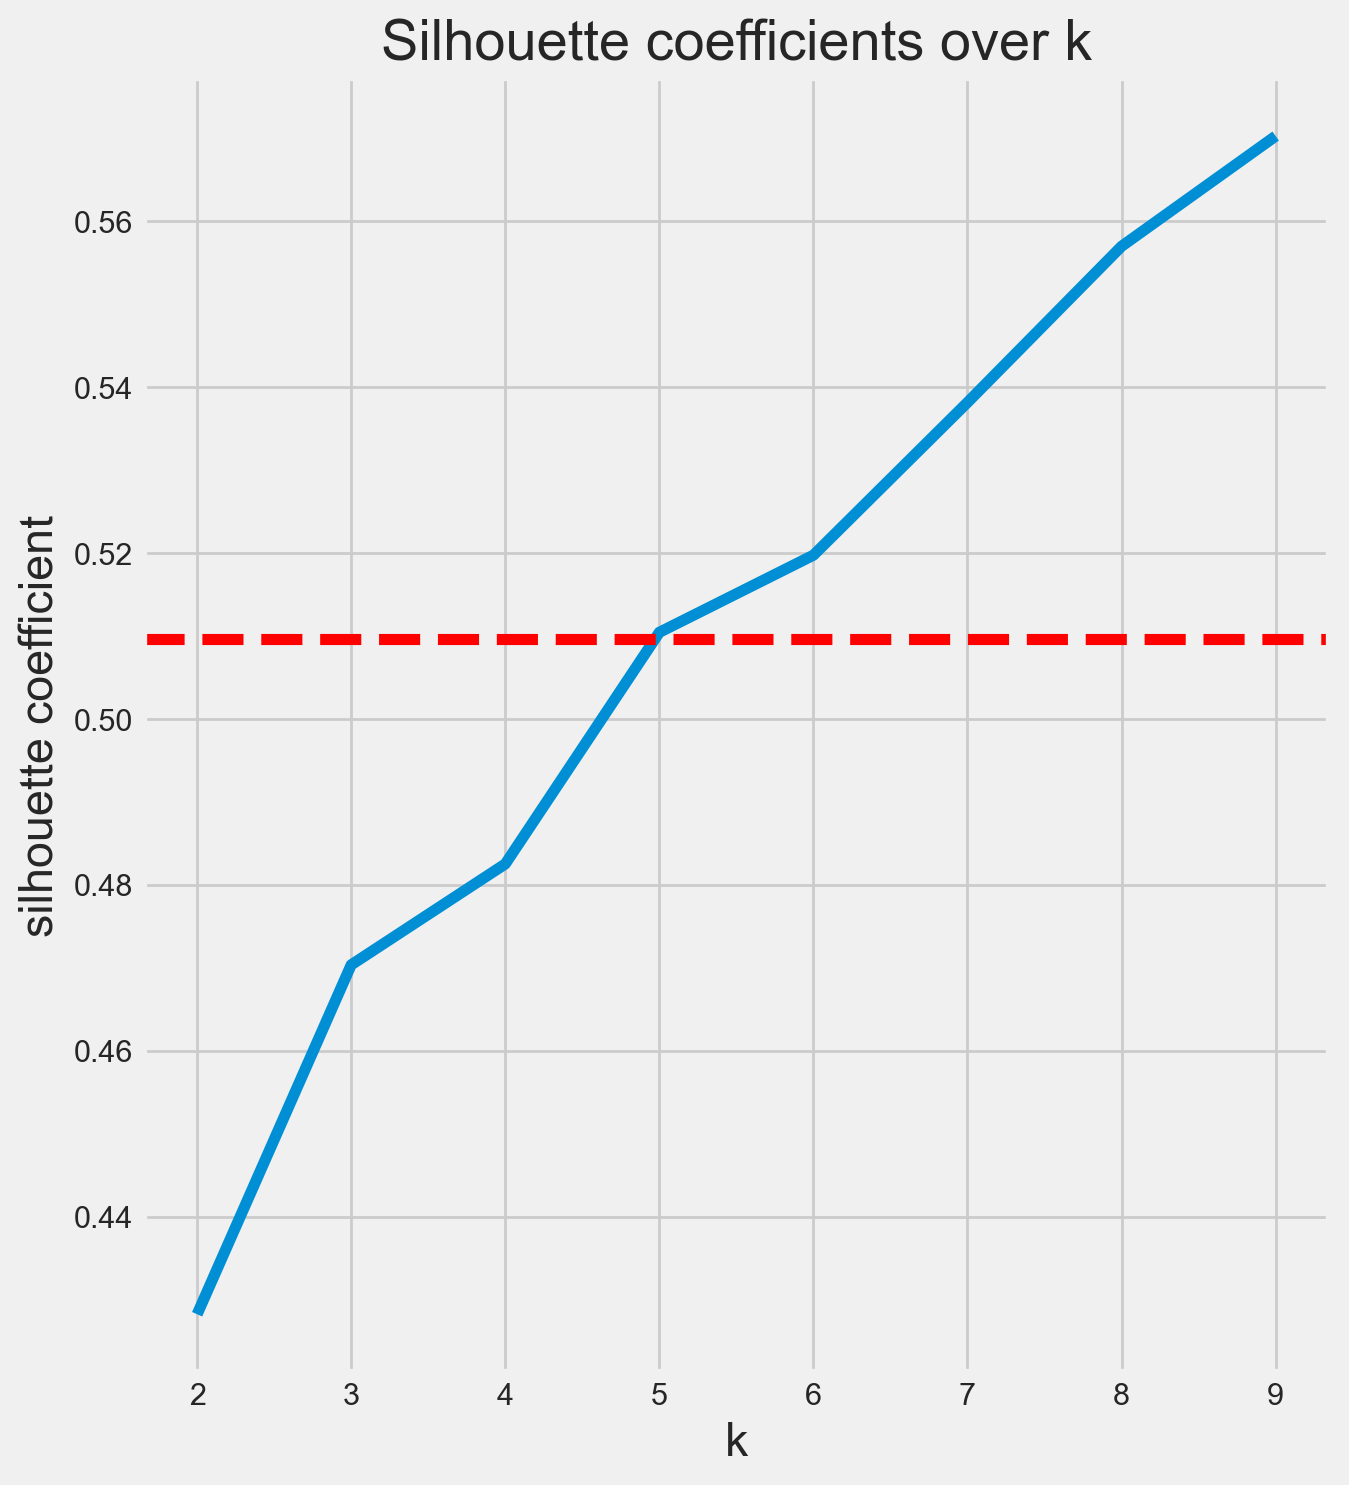

In [531]:
v = PCA_components # change this to test different 



X = v.copy()

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [532]:
# fit the model with the scaled dataframe
model = KMeans(n_clusters=4).fit(PCA_components)

# create a new dataframe showing the clusters and scaled data
cluster_pca4 = pd.DataFrame()
cluster_pca4['Neighborhood']=ny_grouped.Neighborhoods.values
cluster_pca4['cluster']=model.labels_


# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_pca4['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(PCA_components.values, cluster_pca4['cluster'])}")

Distribution of clusters:
3    72
0    72
2    35
1    21
Name: cluster, dtype: int64
Silhouette score: 0.4865274554706786


In [533]:
# fit the model with the scaled dataframe
model = KMeans(n_clusters=3).fit(PCA_components)

# create a new dataframe showing the clusters and scaled data
cluster_pca3 = pd.DataFrame()
cluster_pca3['Neighborhood']=ny_grouped.Neighborhoods.values
cluster_pca3['cluster']=model.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_pca3['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(PCA_components.values, cluster_pca3['cluster'])}")

Distribution of clusters:
2    90
0    63
1    47
Name: cluster, dtype: int64
Silhouette score: 0.4703717814744911


In [534]:
# fit the model with the scaled dataframe
model = KMeans(n_clusters=2).fit(PCA_components)

# create a new dataframe showing the clusters and scaled data
cluster_pca2 = pd.DataFrame()
cluster_pca2['Neighborhood']=ny_grouped.Neighborhoods.values
cluster_pca2['cluster']=model.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_pca2['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(PCA_components.values, cluster_pca2['cluster'])}")

Distribution of clusters:
1    110
0     90
Name: cluster, dtype: int64
Silhouette score: 0.4282577025138844


In [535]:
cluster_pca3

,Neighborhood,cluster
0,Annadale Staten Island,2
1,Arden Heights Staten Island,1
2,Arlington Staten Island,1
3,Arrochar Staten Island,1
4,Aspen Knolls,0
...,...,...
195,Willowbrook Staten Island,1
196,Woodhaven Queens,0
197,Woodside Queens,2
198,World Trade Center,2


In [536]:
cluster_pca4

,Neighborhood,cluster
0,Annadale Staten Island,0
1,Arden Heights Staten Island,1
2,Arlington Staten Island,1
3,Arrochar Staten Island,1
4,Aspen Knolls,3
...,...,...
195,Willowbrook Staten Island,3
196,Woodhaven Queens,3
197,Woodside Queens,0
198,World Trade Center,0


In [537]:
cluster_pca2

,Neighborhood,cluster
0,Annadale Staten Island,0
1,Arden Heights Staten Island,1
2,Arlington Staten Island,1
3,Arrochar Staten Island,1
4,Aspen Knolls,1
...,...,...
195,Willowbrook Staten Island,1
196,Woodhaven Queens,1
197,Woodside Queens,0
198,World Trade Center,0


In [538]:
cluster_pca4.cluster.value_counts()

3    72
0    72
2    35
1    21
Name: cluster, dtype: int64

In [539]:
cluster_pca3.cluster.value_counts()

2    90
0    63
1    47
Name: cluster, dtype: int64

In [540]:
cluster_pca2.cluster.value_counts()

1    110
0     90
Name: cluster, dtype: int64

In [541]:
ny.head()
ny['Neighborhood'] = ny['Neighborhood'].map(lambda x: re.sub(r'\W+', ' ', x))
ny

,Neighborhood,Latitude,Longitude
0,Bedford Park Bronx,40.869990,-73.885730
1,Belmont Bronx,40.855460,-73.885690
2,City Island Bronx,40.855640,-73.791710
3,Co op City Bronx,40.879939,-73.823170
4,Concourse Bronx,40.827630,-73.925330
...,...,...,...
206,Ward Hill Staten Island,40.633485,-74.118298
207,West New Brighton Staten Island,40.557574,-74.204474
208,West Shore Staten Island,40.618020,-74.132850
209,Westerleigh Staten Island,40.603201,-74.141223


In [542]:
cluster_pca3 = cluster_pca3.join(ny.set_index("Neighborhood"), on="Neighborhood")
cluster_pca3

,Neighborhood,cluster,Latitude,Longitude
0,Annadale Staten Island,2,40.559891,-74.198791
1,Arden Heights Staten Island,1,40.642395,-74.110820
2,Arlington Staten Island,1,40.642420,-74.075270
3,Arrochar Staten Island,1,40.562344,-74.184025
4,Aspen Knolls,0,40.554536,-74.135866
...,...,...,...,...
195,Willowbrook Staten Island,1,40.550491,-74.187332
196,Woodhaven Queens,0,40.692630,-73.861020
197,Woodside Queens,2,40.746960,-73.902790
198,World Trade Center,2,40.712569,-74.014081


In [543]:
cluster_pca4 = cluster_pca4.join(ny.set_index("Neighborhood"), on="Neighborhood")
cluster_pca4

,Neighborhood,cluster,Latitude,Longitude
0,Annadale Staten Island,0,40.559891,-74.198791
1,Arden Heights Staten Island,1,40.642395,-74.110820
2,Arlington Staten Island,1,40.642420,-74.075270
3,Arrochar Staten Island,1,40.562344,-74.184025
4,Aspen Knolls,3,40.554536,-74.135866
...,...,...,...,...
195,Willowbrook Staten Island,3,40.550491,-74.187332
196,Woodhaven Queens,3,40.692630,-73.861020
197,Woodside Queens,0,40.746960,-73.902790
198,World Trade Center,0,40.712569,-74.014081


In [544]:
cluster_pca2 = cluster_pca2.join(ny.set_index("Neighborhood"), on="Neighborhood")
cluster_pca2

,Neighborhood,cluster,Latitude,Longitude
0,Annadale Staten Island,0,40.559891,-74.198791
1,Arden Heights Staten Island,1,40.642395,-74.110820
2,Arlington Staten Island,1,40.642420,-74.075270
3,Arrochar Staten Island,1,40.562344,-74.184025
4,Aspen Knolls,1,40.554536,-74.135866
...,...,...,...,...
195,Willowbrook Staten Island,1,40.550491,-74.187332
196,Woodhaven Queens,1,40.692630,-73.861020
197,Woodside Queens,0,40.746960,-73.902790
198,World Trade Center,0,40.712569,-74.014081


In [545]:
# get the coordinates of New York City
address = 'New York, New York'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York, New York {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York, New York 40.7127281, -74.0060152.


In [546]:
# create map
kclusters = 4
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_pca4['Latitude'], cluster_pca4['Longitude'], cluster_pca4['Neighborhood'], cluster_pca4['cluster']):
    label = folium.Popup('{} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=tab10[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [548]:
# create map
kclusters = 3
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_pca3['Latitude'], cluster_pca3['Longitude'], cluster_pca3['Neighborhood'], cluster_pca3['cluster']):
    label = folium.Popup('{} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=tab10[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [549]:
# create map
kclusters = 2
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_pca2['Latitude'], cluster_pca2['Longitude'], cluster_pca2['Neighborhood'], cluster_pca2['cluster']):
    label = folium.Popup('{} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=tab10[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [550]:
exp2 = cluster_pca2.join(y.set_index("Neighborhood"),
                         on="Neighborhood")
exp2

,Neighborhood,cluster,Latitude,Longitude,Supermarket,Market,Fast Food Restaurant,Grocery Store
0,Annadale Staten Island,0,40.559891,-74.198791,0.000000,0.0,0.000000,1.00
1,Arden Heights Staten Island,1,40.642395,-74.110820,0.200000,0.0,0.800000,0.00
2,Arlington Staten Island,1,40.642420,-74.075270,0.000000,0.0,1.000000,0.00
3,Arrochar Staten Island,1,40.562344,-74.184025,0.000000,0.0,1.000000,0.00
4,Aspen Knolls,1,40.554536,-74.135866,0.333333,0.0,0.166667,0.50
...,...,...,...,...,...,...,...,...
195,Willowbrook Staten Island,1,40.550491,-74.187332,0.000000,0.0,0.500000,0.50
196,Woodhaven Queens,1,40.692630,-73.861020,0.250000,0.0,0.250000,0.50
197,Woodside Queens,0,40.746960,-73.902790,0.000000,0.0,0.250000,0.75
198,World Trade Center,0,40.712569,-74.014081,0.000000,0.0,0.000000,1.00


In [551]:
exp3 = cluster_pca3.join(y.set_index("Neighborhood"),
                         on="Neighborhood")
exp3

,Neighborhood,cluster,Latitude,Longitude,Supermarket,Market,Fast Food Restaurant,Grocery Store
0,Annadale Staten Island,2,40.559891,-74.198791,0.000000,0.0,0.000000,1.00
1,Arden Heights Staten Island,1,40.642395,-74.110820,0.200000,0.0,0.800000,0.00
2,Arlington Staten Island,1,40.642420,-74.075270,0.000000,0.0,1.000000,0.00
3,Arrochar Staten Island,1,40.562344,-74.184025,0.000000,0.0,1.000000,0.00
4,Aspen Knolls,0,40.554536,-74.135866,0.333333,0.0,0.166667,0.50
...,...,...,...,...,...,...,...,...
195,Willowbrook Staten Island,1,40.550491,-74.187332,0.000000,0.0,0.500000,0.50
196,Woodhaven Queens,0,40.692630,-73.861020,0.250000,0.0,0.250000,0.50
197,Woodside Queens,2,40.746960,-73.902790,0.000000,0.0,0.250000,0.75
198,World Trade Center,2,40.712569,-74.014081,0.000000,0.0,0.000000,1.00


In [552]:
exp3.to_csv('cluster3.csv',index=False)


In [553]:
exp2.to_csv('cluster2.csv',index=False)
